<a href="https://colab.research.google.com/github/forest416/3/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

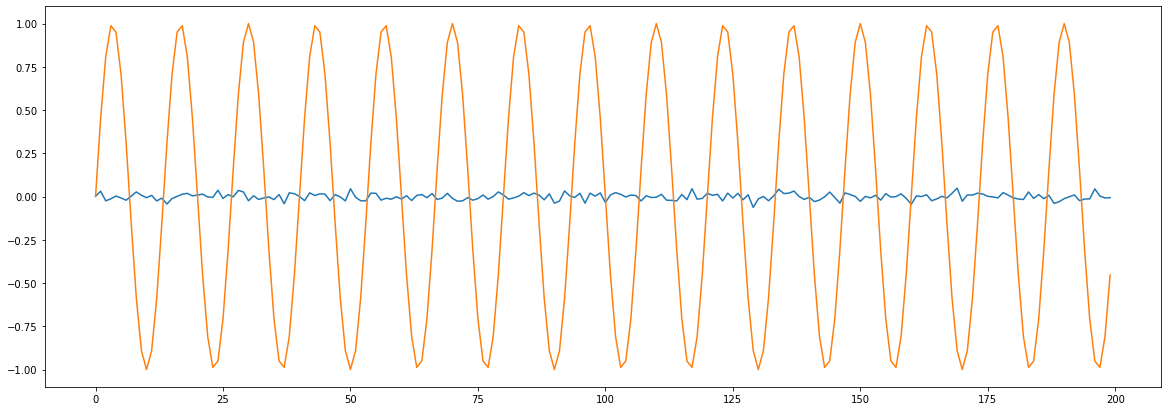

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

siz = 200
cycles = 15
standardSine=np.zeros(siz)
#print(len(standardSine))
#print(standardSine)
standardSine[:]=np.sin(np.arange(len(standardSine)) * np.pi/siz*2*cycles)


sig = np.zeros((3,siz))
sig[0,:] = np.sin(np.arange(len(sig[0])) * np.pi/siz*2*cycles) 

rands = np.zeros((3,siz))
rands[0,:] = np.random.standard_normal(siz)/50
rands[1,:] = np.random.standard_normal(siz)
rands[2,:] = np.random.standard_normal(siz)

plt.plot(rands[0,:])
#print (rands)
#print (sig)
plt.plot(sig[0,:])


Show combine of sine and noise

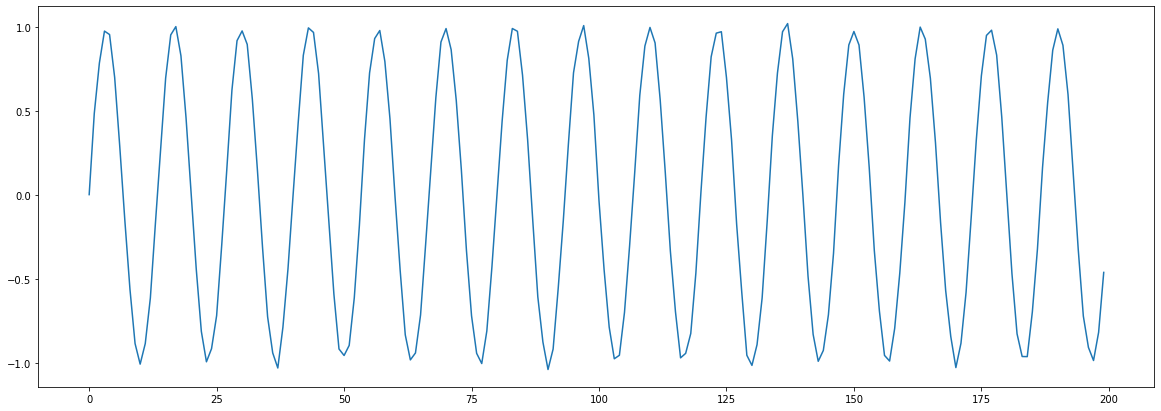

In [ ]:
sig[0,:] = sig[0,:] + rands[0]
plt.plot(sig[0,:])

sig with std 0.37448470469637785
std with std 0.5000000000000001
HERE, ther are not the same!!


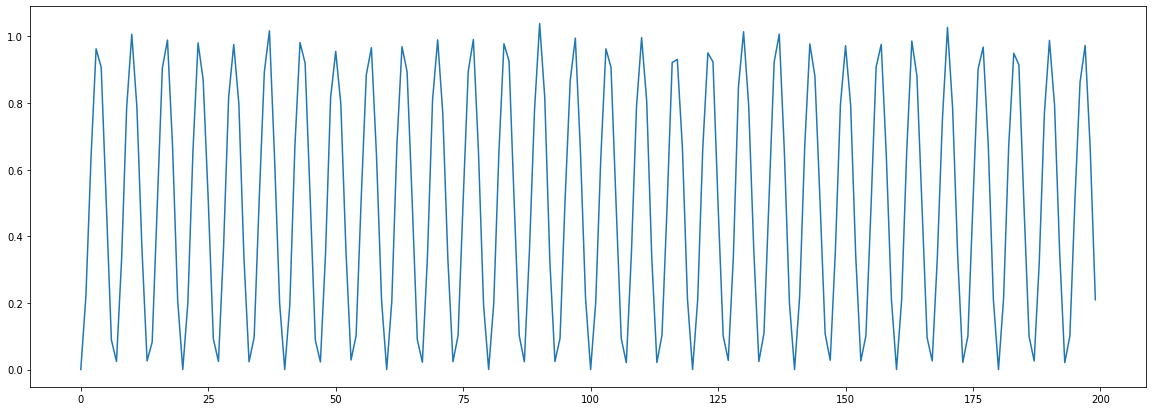

In [ ]:
multi = np.multiply(standardSine , sig[0,:])
plt.plot(multi)
amp=np.dot(multi, multi)
print("sig with std", amp/siz)
print("std with std", np.dot(standardSine,standardSine)/siz)
print("HERE, ther are not the same!!")

Go by FFT way


[200]
(3476.497519305517-928.199890402166j) 8.99568995348606
199-201
(694.3750592409162-185.65385744704767j) 1.7969141564095281 -0.26125729994378233
(3476.497519305517-928.199890402166j) 8.99568995348606 -0.26090687077355634
(-1163.493177017908+310.1858016620474j) 3.0103276446675533 2.881053690623527
mag= 8.99568995348606 phase= -0.26090687077355634 ( (3476.497519305517-928.199890402166j) )
8.99568995348606 (3476.497519305517-928.199890402166j)
0.44917964458833176


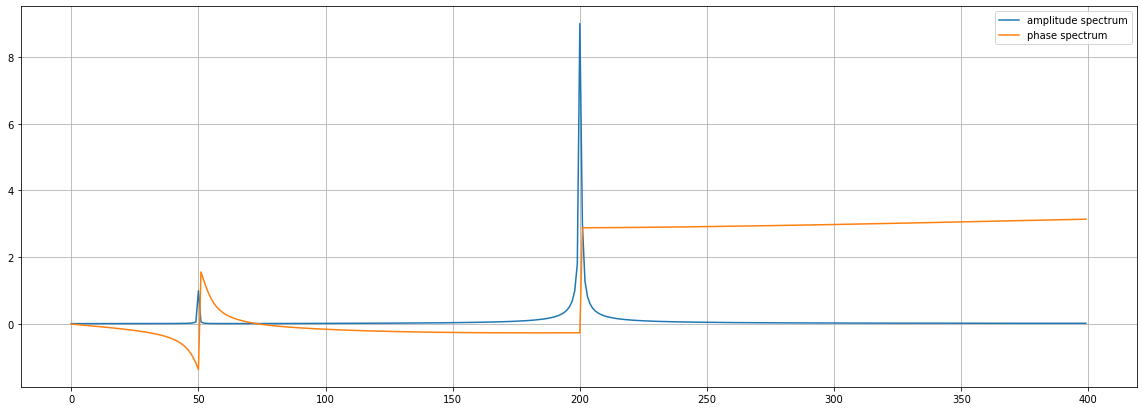

In [ ]:
#ref URL:https://dsp.stackexchange.com/questions/72005/calculate-the-magnitude-and-phase-of-a-signal-at-a-particular-frequency-in-pytho

#number of sample points
N=siz
N=800
# sample spacing

T=1/cycles  # f=cycles
#
T=1.0/800.0 #f=800

x=np.linspace(0.0, N*T, N)
t0=np.pi/6
#t0=0
y1= np.sin(50* 2*np.pi *x) 
y2=10*np.sin(200*2*np.pi*x +t0)
y=y1+y2
#plt.plot( y1)

#yf=np.fft.fft(sig[0,:])
yf=np.fft.fft(y)

freq = np.fft.fftfreq(x.size, d=T)
index, = np.where(np.isclose(freq, 200, atol=1/(T*N)/2))
print(index)
mag=np.abs(yf[index[0]])
print(yf[index[0]], np.abs(yf[index[0]])*2/N)
print("199-201")
print(yf[199], np.abs(yf[199])*2/N, np.angle(yf[199]))
print(yf[200], np.abs(yf[200])*2/N, np.angle(yf[200]))
print(yf[201], np.abs(yf[201])*2/N, np.angle(yf[201]))
phase=np.angle(yf[index[0]], deg=False)
print("mag=", mag*2/N, "phase=", phase, "(",yf[index[0]],")")

print(np.abs(yf[200])*2/N, yf[200])
print(np.abs(173.627-46.213j)*2/N)
#plot
plt.plot(freq[0:N//2], 2/N*np.abs(yf[0:N//2]), label='amplitude spectrum')
plt.plot(freq[0:N//2], np.angle(yf[0:N//2]), label='phase spectrum')
plt.legend()
plt.grid()
plt.show()

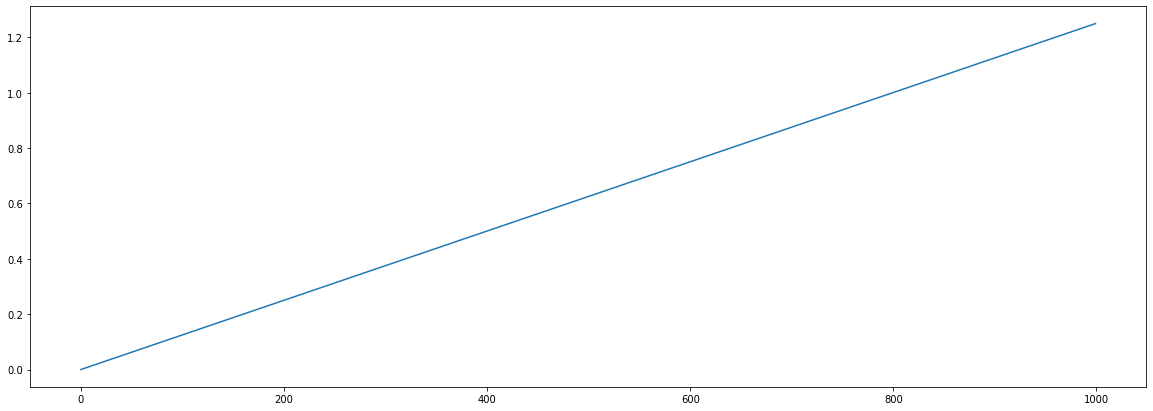

In [ ]:
N=1000
T=1.0/800.0
x=np.linspace(0.0, N*T, N)
plt.plot(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


(56.554396599579384-9.89294940341705j) 1.1482630748467157 -0.17317583793346278
0.9981526694984627 1.2816515070894912
0.9981062136022725 1.2816515070894912
0.9980928860130849 1.2816515070894912
0.9980875965953317 1.2816515070894912


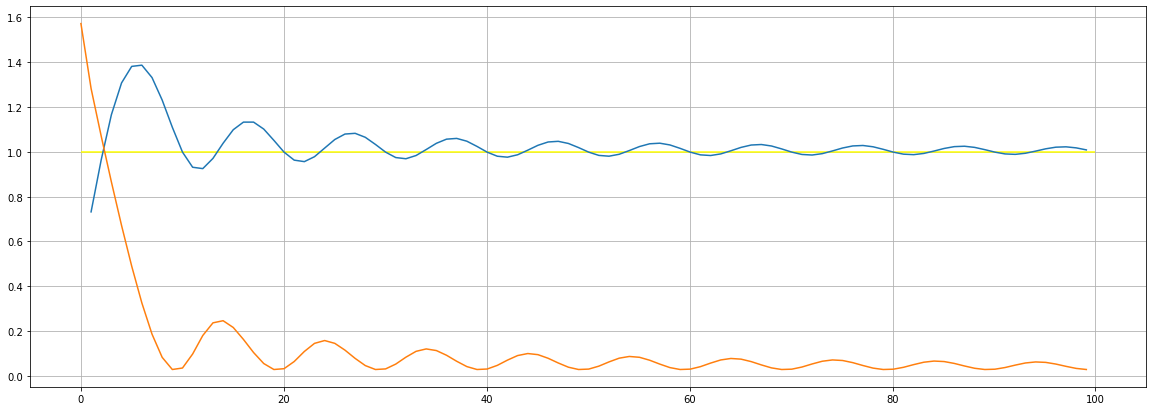

In [ ]:
N=1000
x=np.linspace(0.0, 1, N)
f = 50
sig=np.sin(2*np.pi* x * f +.03 ) # + 7*np.sin(2*np.pi* x * f/3 )
pat = np.sin(2*np.pi *x *f) + np.cos(2*np.pi*x*f)*1j

clip=100
sigx = sig[:clip]
patx = pat[:clip]
mult = sig * pat
cs = np.cumsum(mult)
amp = np.abs(cs[:clip])*2/x[:clip]/N
ang = np.angle(cs[:clip])

plt.rcParams['figure.figsize'] = [20,7]
plt.plot(x[:clip]*N, amp)
plt.plot(x[:clip]*N, ang)
plt.hlines(y=1, xmin=0, xmax=clip,color='yellow')
plt.grid()
#print(sum, np.abs(sum)*2/clip, np.angle(sum))
# print( np.concatenate((x[:clip]*N//1,  (2*np.abs(cs[:clip])/(x[:clip]*N))),axis=0).reshape(2,clip).T)
for i in (20,40,60,80):
  print(amp[i], ang[1])
